In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='svg'
%matplotlib inline

### Кластеризация k-means

In [2]:
from sklearn.cluster import KMeans

In [3]:
model = KMeans(n_clusters=3, random_state=100)

In [4]:
def make_data(n,seed):
    np.random.seed(seed)
    shift_matrix=np.array([[3,3],
                          [6,9],
                          [9,3]])
    data = np.random.randn(3,2,n)+shift_matrix.reshape((3,2,1))
    data = np.swapaxes(data,1,2)
    data = data.reshape((-1,2))
    data *= np.array([[20,0.5]])
    df = pd.DataFrame({'x':data[:,0],'y':data[:,1]},
                     columns=['x','y'])
    df = df.sample(frac=1.0)
    return df
    

In [5]:
train = make_data(10,42)
test = make_data(10,27)

In [6]:
train.head()

,x,y
21,183.427366,1.307459
20,194.769332,1.662042
8,50.610512,1.045988
3,90.460597,0.543360
5,55.317261,1.218856


Text(0, 0.5, 'Длинна чешуи')

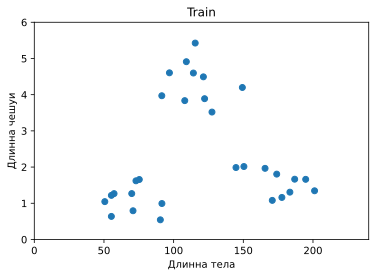

In [11]:
plt.scatter(train['x'],train['y'])
plt.xlim(0,240)
plt.ylim(0,6)
plt.title('Train')
plt.xlabel('Длинна тела')
plt.ylabel('Длинна чешуи')

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled,columns=['x','y'])
train_scaled.describe()

,x,y
count,30.000000,30.000000
mean,0.459784,0.369957
std,0.311149,0.309641
min,0.000000,0.000000
25%,0.189436,0.140814
50%,0.426586,0.229475
75%,0.738708,0.682562
max,1.000000,1.000000


Text(0, 0.5, 'Длина чешуи scaled')

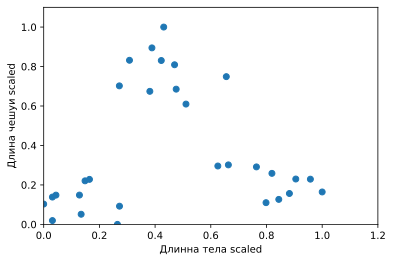

In [26]:
plt.scatter(train_scaled['x'],train_scaled['y'])
plt.xlim(0,1.2)
plt.ylim(0,1.1)
plt.xlabel('Длинна тела scaled')
plt.ylabel('Длина чешуи scaled')

In [28]:
train_labels = model.fit_predict(train_scaled)
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1], dtype=int32)

#### Центры кластеров

In [29]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [30]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

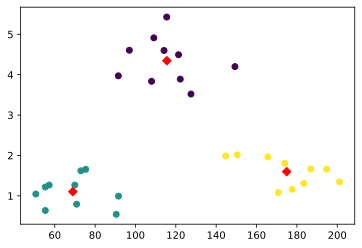

In [35]:
plt.scatter(train['x'],train['y'],c=train_labels)
plt.scatter(centers[:,0],centers[:,1],marker='D',c='red')

#### inertia

Величина, показывающая насколько  в среднем расположены точки от центров своих кластеров 
(сумма квадратов расстояний от объектов до центров их кластеров).
Чем она меньше тем лучше разбиение на кластеры.
Равно нулю, значит кластеров столько сколько и обьектов.

In [36]:
model.inertia_

0.5417377477488047

In [37]:
inertia_arr = []
for i in range(2,10):
    temp_model = KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

2.9002641632095463
0.5417377477488046
0.42817368911748505
0.3258659915567972
0.26736166193637667
0.20725794455977645
0.16774172223409062
0.14671272476076846


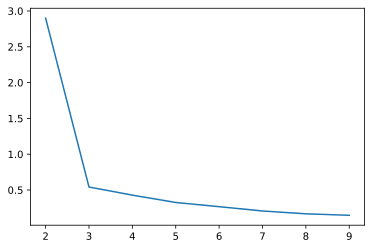

In [39]:
plt.plot([i for i in range(2,10)],inertia_arr)

#### Отнесение примеров из тестового датасета к определенному кластеру

In [41]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled,columns=['x','y'])
test_scaled.describe()

,x,y
count,30.000000,30.000000
mean,0.480551,0.430613
std,0.350808,0.329392
min,0.022045,0.060873
25%,0.151336,0.172937
50%,0.446210,0.264844
75%,0.819377,0.792273
max,1.099940,1.073686


In [42]:
test_labels = model.predict(test_scaled)
test_labels 

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2], dtype=int32)

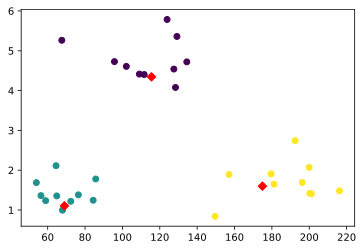

In [47]:
plt.scatter(test['x'],test['y'],c=test_labels)
plt.scatter(centers[:,0],centers[:,1],marker='D',color='red')

### AgglomerativeClustering

**Агломеративные** алгоритмы - алгоритмы иерархического подхода, основанные на обьединение мелких кластеров в более крупные. Вначале каждый  -обьектк считается отдельным кластером.

**Дивизитивные** алгоритмы - когда вся выборка считается обним кластером и делиться на более мелкие.


In [62]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
model = AgglomerativeClustering(n_clusters=3)

In [64]:
train_labels = model.fit_predict(train_scaled)

In [65]:
train_labels

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1])

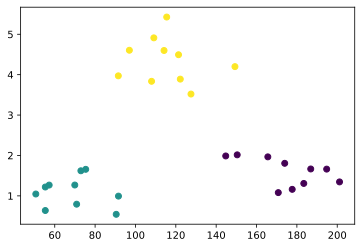

In [66]:
plt.scatter(train['x'],train['y'],c=train_labels)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)

In [69]:
knn.fit(train_scaled,train_labels)

KNeighborsClassifier()

In [70]:
test_labels = knn.predict(test_scaled)

In [71]:
test_labels

array([1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 0])

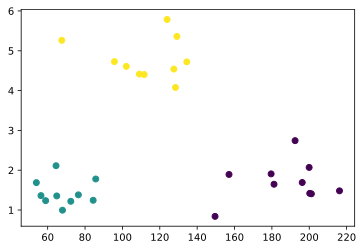

In [72]:
plt.scatter(test['x'],test['y'],c=test_labels)